# Genetic Algorithm Portfolio Optimization

## Dependencies Set-up

In [2]:
# --- Import Required Libraries ---
import os
import sys
import matplotlib.pyplot as plt

# --- Set Up Paths ---
ROOT_PATH = os.path.abspath(os.path.join(os.getcwd(), '..'))
if ROOT_PATH not in sys.path:
    sys.path.insert(0, ROOT_PATH)
    
# --- Import Custom Libraries ---
from pop.runner import runner
from pop.util.print_results import print_results
from pop.util.file_saver import save_results, save_fitness_history, save_diversity_history

## Parameters Definition

In [3]:
# --- Define Experiment Parameters ---
# Algorithm type: 'ga' (Genetic Algorithm) or 'pso' (Particle Swarm Optimization)
algorithm_type = "pso"

# Dataset folder name
dataset_folder_name = "../dataset"

# Number of companies to include in the portfolio
num_companies = 50

# Annual risk-free rate
risk_free_rate_annual = 0.042

# Analysis period
start_date = "2015-01-01"
end_date = "2020-01-01"

# Correlation level (optional): 'low', 'medium', 'high', or None
correlation_level = None

# Random seed for reproducibility
seed = 0

## Hyperparameter & Model Configuration

In [4]:
# --- Algorithm-Specific Parameters ---
# GA Parameters
ga_params = {
    "pop_size": 100,
    "max_generations": 300,
    "mutation_rate": 0.1,
    "gaussian_stdev": 0.1,
    "num_elites": 1,
    "tournament_size": 3,
}

# PSO Parameters
pso_params = {
    "swarm_size": 100,
    "max_iterations": 300,
    "w": 0.5,
    "c1": 1.5,
    "c2": 2.0,
}

# Repair method for constraint handling: 'normalize', 'clip', 'restart', 'shrink'
repair_method = "normalize"

## Experiment Execution

In [15]:
# --- Execute Experiment ---
if algorithm_type == "ga":
    params = ga_params
elif algorithm_type == "pso":
    params = pso_params
else:
    raise ValueError("Invalid algorithm type. Choose 'ga' or 'pso'.")

# Run the experiment
(results, fitness_history, diversity_history) = runner(
    algorithm_type=algorithm_type,
    dataset_folder_name=dataset_folder_name,
    num_companies=num_companies,
    risk_free_rate_annual=risk_free_rate_annual,
    start_date=start_date,
    end_date=end_date,
    correlation_level=correlation_level,
    seed=seed,
    repair_method=repair_method,
    **params
)

# --- Display Results ---
sharpe_ratio, annual_return, weights = results
print_results(sharpe_ratio, annual_return, weights)


                         PORTFOLIO OPTIMIZATION RESULTS

Sharpe Ratio: 0.9089289271866603
Annual Return: 482.7129124311099 (48271.29124311099%)

Portfolio Distribution:
--------------------------------------------------------------------------------
Company                                           Weight      Percentage
--------------------------------------------------------------------------------
NVR, Inc. Common Stock                            0.1578          15.78%
Pivotal Investment Corporation II Class A Co...     0.1578          15.78%
EastGroup Properties, Inc. Common Stock           0.1578          15.78%
HubSpot, Inc. Common Stock                        0.1577          15.77%
Carolina Financial Corporation - Common Stoc...     0.1576          15.76%
Intuitive Surgical, Inc. - Common Stock           0.1576          15.76%
Nuveen Municipal Credit Income Fund               0.1570          15.70%
Advanced Energy Industries, Inc. - Common St...     0.1558          15.58%
Dougl

In [6]:
# --- Save Results ---
# Simplify correlation level
correlation_str = {
    "low": "L",
    "medium": "M",
    "high": "H",
    None: "N"
}.get(correlation_level, "N")

# Simplify parameter string
if algorithm_type == "ga":
    algo_folder = "ga"
    param_str = f"ps-{ga_params['pop_size']}_mg-{ga_params['max_generations']}_mr-{ga_params['mutation_rate']}"
elif algorithm_type == "pso":
    algo_folder = "pso"
    param_str = f"ss-{pso_params['swarm_size']}_mi-{pso_params['max_iterations']}_w-{pso_params['w']}"

# Define the results directory relative to the project root
results_dir = os.path.join(ROOT_PATH, "experiments", "results", algo_folder)
filename = f"exp_{correlation_str}_{param_str}"

# Save results
save_results(results_dir, filename, weights, sharpe_ratio, annual_return)

Results saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_N_ss-100_mi-300_w-0.5_results.csv


In [7]:
# Save fitness history
save_fitness_history(results_dir, filename, fitness_history)

# Save diversity history
save_diversity_history(results_dir, filename, diversity_history)

Fitness history saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_N_ss-100_mi-300_w-0.5_fitness.csv
Diversity history saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_N_ss-100_mi-300_w-0.5_diversity.csv


## Visualize fitness evolution

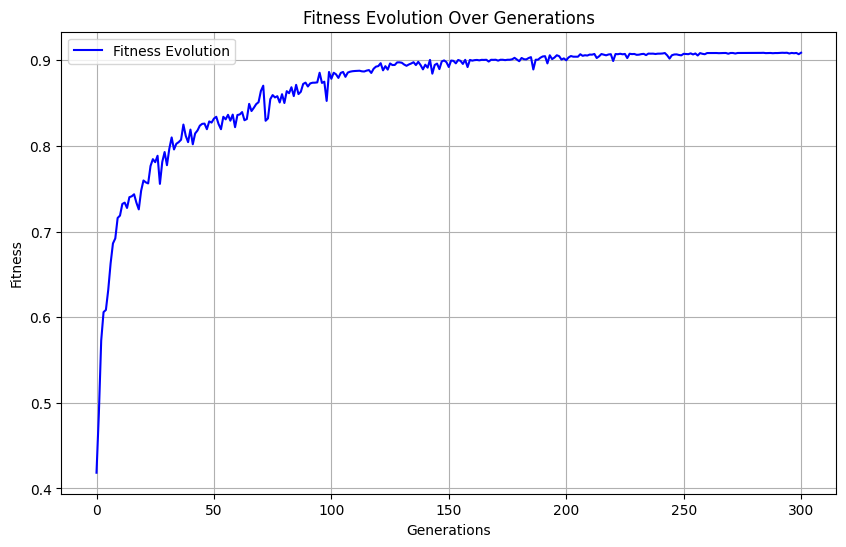

In [8]:
# ---Plotting Fitness Evolution---
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, label="Fitness Evolution", color="blue")
plt.title("Fitness Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.legend()
plt.grid()
plt.show()

In [9]:
# --- Save Fitness Evolution Plot ---
fitness_plot_path = os.path.join(results_dir, f"{filename}_fitness_evolution.png")
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, label="Fitness Evolution", color="blue")
plt.title("Fitness Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.legend()
plt.grid()
plt.savefig(fitness_plot_path)
plt.clf()
print(f"Fitness evolution plot saved to {fitness_plot_path}")

Fitness evolution plot saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_N_ss-100_mi-300_w-0.5_fitness_evolution.png


<Figure size 1000x600 with 0 Axes>

## Visualize diversity evolution

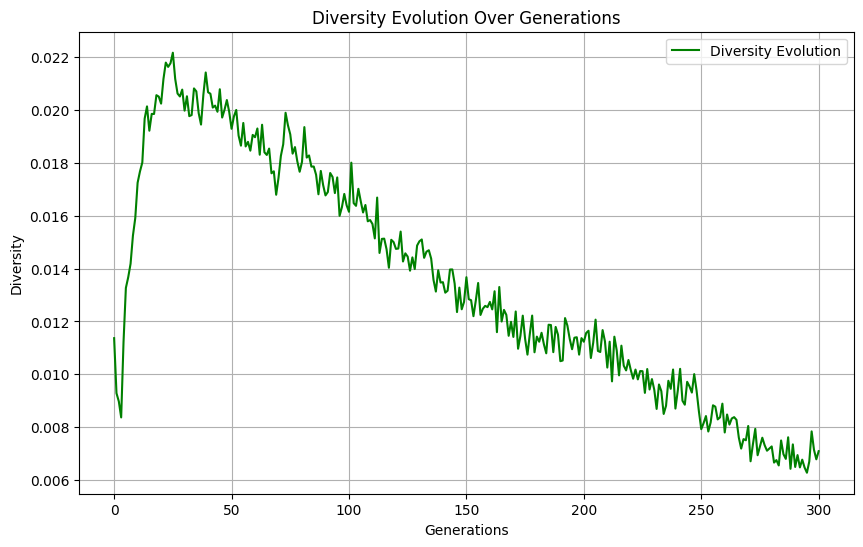

In [10]:
# --- Plot Diversity Evolution ---
plt.figure(figsize=(10, 6))
plt.plot(diversity_history, label="Diversity Evolution", color="green")
plt.title("Diversity Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Diversity")
plt.legend()
plt.grid()
plt.show()

In [11]:
# --- Save Diversity Evolution Plot ---
diversity_plot_path = os.path.join(results_dir, f"{filename}_diversity_evolution.png")
plt.figure(figsize=(10, 6))
plt.plot(diversity_history, label="Diversity Evolution", color="green")
plt.title("Diversity Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Diversity")
plt.legend()
plt.grid()
plt.savefig(diversity_plot_path)
plt.clf()
print(f"Diversity evolution plot saved to {diversity_plot_path}")

Diversity evolution plot saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_N_ss-100_mi-300_w-0.5_diversity_evolution.png


<Figure size 1000x600 with 0 Axes>

-----

## Fine Tuning

In [ ]:
from itertools import product
import pandas as pd
import numpy as np
import time

# Number of runs for statistically significant results
NUM_RUNS = 30

# Inherit globally defined variables
DATASET = dataset_folder_name
NUM_COMPANIES = num_companies
RISK_FREE_RATE = risk_free_rate_annual
START_DATE = start_date
END_DATE = end_date

# Hyperparameters for Genetic Algorithm (GA)
ga_param_grid = {
    "pop_size": [50, 100],
    "mutation_rate": [0.05, 0.1],
    "gaussian_stdev": [0.05, 0.1],
    "num_elites": [1, 2]
}

# Hyperparameters for Particle Swarm Optimization (PSO)
pso_param_grid = {
    "pop_size": [50, 100],
    "w": [0.5, 0.7],
    "c1": [1.0, 1.5],
    "c2": [1.5, 2.0]
}

# Possible repair methods
REPAIR_METHODS = ["normalize", "clip", "restart", "shrink"]

# Helper function to create parameter combinations
def get_param_combinations(param_grid):
    keys, values = zip(*param_grid.items())
    return [dict(zip(keys, combo)) for combo in product(*values)]

# Function to evaluate a specific configuration
def evaluate_config(algorithm_type, config):
    scores, times, returns = [], [], []
    for _ in range(NUM_RUNS):
        start = time.time()
        
        # Prepare the parameters properly
        try:
            # Run the experiment
            results, fitness_history, diversity_history = runner(
                algorithm_type=algorithm_type,
                dataset_folder_name=DATASET,
                num_companies=NUM_COMPANIES,
                risk_free_rate_annual=RISK_FREE_RATE,
                start_date=START_DATE,
                end_date=END_DATE,
                correlation_level=correlation_level,
                seed=seed,
                **config
            )

            # Unpack the results correctly
            sharpe_ratio, annual_return, weights = results

            # Store the results if valid
            if isinstance(sharpe_ratio, (int, float)) and isinstance(annual_return, (int, float)):
                scores.append(sharpe_ratio)
                returns.append(annual_return)
                times.append(time.time() - start)
            else:
                print(f"⚠️ Warning: Invalid result format: {results}")
        
        except Exception as e:
            print(f"❌ Error during evaluation of {algorithm_type} with config {config}: {e}")

    # If no valid results were collected, return NaN
    if not scores:
        print(f"⚠️ No valid results for {algorithm_type} with config {config}")
        return np.nan, np.nan, np.nan, np.nan, config

    # Calculate mean and standard deviation of results
    return np.mean(scores), np.std(scores), np.mean(returns), np.mean(times), config

# Fine-tuning process for both GA and PSO algorithms
def fine_tune_algorithms():
    results = []

    print("🚀 Starting fine-tuning for GA...")
    for repair in REPAIR_METHODS:
        for config in get_param_combinations(ga_param_grid):
            print(f"🔄 Testing GA with config: {config} + repair method: {repair}")
            mean_score, std_score, mean_return, mean_time, used_config = evaluate_config("ga", {
                **config,
                "repair_method": repair
            })
            results.append({
                "algorithm": "GA",
                "repair_method": repair,
                "mean_sharpe": mean_score,
                "std_sharpe": std_score,
                "mean_return": mean_return,
                "mean_time": mean_time,
                **used_config
            })

    print("\n🚀 Starting fine-tuning for PSO...")
    for repair in REPAIR_METHODS:
        for config in get_param_combinations(pso_param_grid):
            print(f"🔄 Testing PSO with config: {config} + repair method: {repair}")
            mean_score, std_score, mean_return, mean_time, used_config = evaluate_config("pso", {
                **config,
                "repair_method": repair
            })
            results.append({
                "algorithm": "PSO",
                "repair_method": repair,
                "mean_sharpe": mean_score,
                "std_sharpe": std_score,
                "mean_return": mean_return,
                "mean_time": mean_time,
                **used_config
            })

    # Save fine-tuning results
    df = pd.DataFrame(results)
    df.to_csv("fine_tuning_results.csv", index=False)
    print("✅ Fine-tuning completed. Results saved to 'fine_tuning_results.csv'")
    return df

# Execute fine-tuning
fine_tuning_results = fine_tune_algorithms()

# Function to find the best, median, and worst configurations
def select_configs(df, algorithm):
    df_algo = df[df["algorithm"] == algorithm]
    best_config = df_algo.loc[df_algo["mean_sharpe"].idxmax()]
    worst_config = df_algo.loc[df_algo["mean_sharpe"].idxmin()]
    median_config = df_algo.iloc[(len(df_algo) // 2)]

    # Label the quality for each configuration
    best_config["quality"] = "best"
    median_config["quality"] = "median"
    worst_config["quality"] = "worst"

    print(f"🏆 Best configuration for {algorithm}:\n{best_config}\n")
    print(f"⚖️ Median configuration for {algorithm}:\n{median_config}\n")
    print(f"🚫 Worst configuration for {algorithm}:\n{worst_config}\n")

    return best_config, median_config, worst_config

# Load fine-tuning results from the CSV file
def load_fine_tuning_results():
    try:
        return pd.read_csv("fine_tuning_results.csv")
    except FileNotFoundError:
        print("⚠️ Fine-tuning results not found. Please run fine-tuning first.")
        return None

# Save the selected configurations to a file
def save_selected_configs():
    fine_tuning_results = load_fine_tuning_results()
    if fine_tuning_results is not None:
        best_ga, median_ga, worst_ga = select_configs(fine_tuning_results, "GA")
        best_pso, median_pso, worst_pso = select_configs(fine_tuning_results, "PSO")

        selected_configs = pd.DataFrame([best_ga, median_ga, worst_ga, best_pso, median_pso, worst_pso])
        selected_configs.to_csv("results/selected_configs.csv", index=False)
        print("✅ Selected configurations saved to 'results/selected_configs.csv'")

# Save the best, median, and worst configurations
save_selected_configs()

# Function to set parameters based on the selected configurations
def set_parameters(algorithm, quality):
    selected_configs = pd.read_csv("experiments/results/selected_configs.csv")
    config = selected_configs[(selected_configs["algorithm"] == algorithm) & (selected_configs["quality"] == quality)].iloc[0]
    return config.to_dict()

# Load best, median, and worst configurations for GA and PSO
best_ga_params = set_parameters("GA", "best")
median_ga_params = set_parameters("GA", "median")
worst_ga_params = set_parameters("GA", "worst")

best_pso_params = set_parameters("PSO", "best")
median_pso_params = set_parameters("PSO", "median")
worst_pso_params = set_parameters("PSO", "worst")
print("✅ Best, median, and worst configurations loaded successfully.")

🚀 Starting fine-tuning for GA...
🔄 Testing GA with config: {'pop_size': 50, 'mutation_rate': 0.05, 'gaussian_stdev': 0.05, 'num_elites': 1} + repair method: normalize
🔄 Testing GA with config: {'pop_size': 50, 'mutation_rate': 0.05, 'gaussian_stdev': 0.05, 'num_elites': 2} + repair method: normalize
🔄 Testing GA with config: {'pop_size': 50, 'mutation_rate': 0.05, 'gaussian_stdev': 0.1, 'num_elites': 1} + repair method: normalize
🔄 Testing GA with config: {'pop_size': 50, 'mutation_rate': 0.05, 'gaussian_stdev': 0.1, 'num_elites': 2} + repair method: normalize
🔄 Testing GA with config: {'pop_size': 50, 'mutation_rate': 0.1, 'gaussian_stdev': 0.05, 'num_elites': 1} + repair method: normalize
🔄 Testing GA with config: {'pop_size': 50, 'mutation_rate': 0.1, 'gaussian_stdev': 0.05, 'num_elites': 2} + repair method: normalize
🔄 Testing GA with config: {'pop_size': 50, 'mutation_rate': 0.1, 'gaussian_stdev': 0.1, 'num_elites': 1} + repair method: normalize
🔄 Testing GA with config: {'pop_siz

C:\Users\lara\AppData\Local\Temp\ipykernel_3236\1847357321.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_config["quality"] = "best"
C:\Users\lara\AppData\Local\Temp\ipykernel_3236\1847357321.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_config["quality"] = "best"
C:\Users\lara\AppData\Local\Temp\ipykernel_3236\1847357321.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_config["quality"] = "median"


OSError: Cannot save file into a non-existent directory: 'results'